In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Checks

In [3]:
df = pd.read_excel("ANZ.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


In [7]:
df.shape

(12043, 23)

In [8]:
pd.DataFrame({"Columns":df.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


In [10]:
print("Unique costomer ID number: ", df.customer_id.nunique())

Unique costomer ID number:  100


In [11]:
print("Dataset rows number: ", len(df))
print("Unique transaction ID number: ", df.transaction_id.nunique())

Dataset rows number:  12043
Unique transaction ID number:  12043


In [12]:
df.date.describe()
# first 2018-08-01, last 2018-10-31 (about 3 months)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [13]:
# Find missing date
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(df.date)
# One missing date on 2018-08-16
# Q: Why data is missing on that date, system error?, holiday?

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

In [14]:
# Non-Null Count and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [16]:
print("Null value in each column")
print(df.isnull().sum())

Null value in each column
status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64


## EDA
skip merely identifiers
- bpay_biller_code
- account
- merchant_id
- merchant_code
- first_name
- transaction_id
- customer_id

In [18]:
# Status
df.status.value_counts(dropna=False)

authorized    7717
posted        4326
Name: status, dtype: int64

In [19]:
# Card present flag
df.card_present_flag.value_counts(dropna=False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

In [20]:
# currency
df.currency.value_counts(dropna=False)
# All transactions are in AUD (maybe drop this column)

AUD    12043
Name: currency, dtype: int64

In [21]:
# long and lat
df.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

In [23]:
# transaction description
df.txn_description.value_counts(dropna=False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of transactions by category')

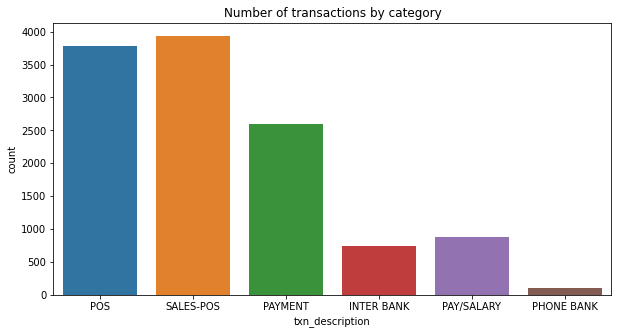

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df.txn_description)
plt.title("Number of transactions by category")

In [25]:
df[["txn_description", "amount"]].groupby("txn_description", as_index=False).mean().sort_values(
    by="amount", ascending=False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

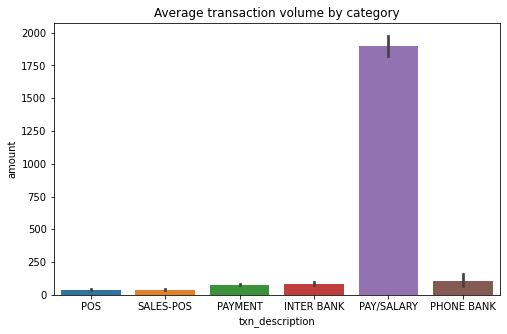

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x="txn_description",y="amount",data=df)
plt.title("Average transaction volume by category")

In [27]:
# Gender
df.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of transactions by gender')

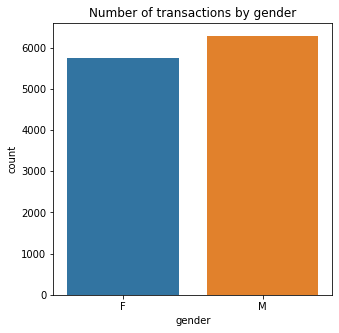

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(df.gender)
plt.title("Number of transactions by gender")

In [30]:
df[["gender", "amount"]].groupby("gender", as_index=False).mean().sort_values(
    by="amount", ascending=False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

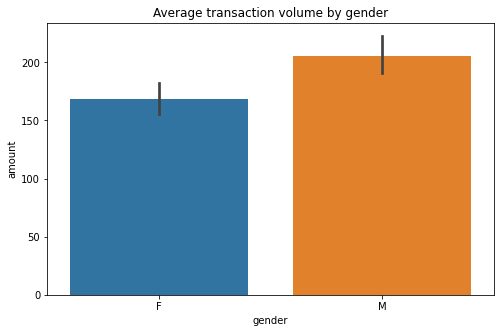

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x="gender", y="amount", data=df)
plt.title("Average transaction volume by gender")

In [32]:
# Merchant suburb
df.merchant_suburb.value_counts(dropna=False)

NaN              4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
                 ... 
Calamvale           1
Auchenflower        1
Trafalgar           1
Myrniong            1
Walgett             1
Name: merchant_suburb, Length: 1610, dtype: int64

In [33]:
# Merchant state
df.merchant_state.value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of transactions by state')

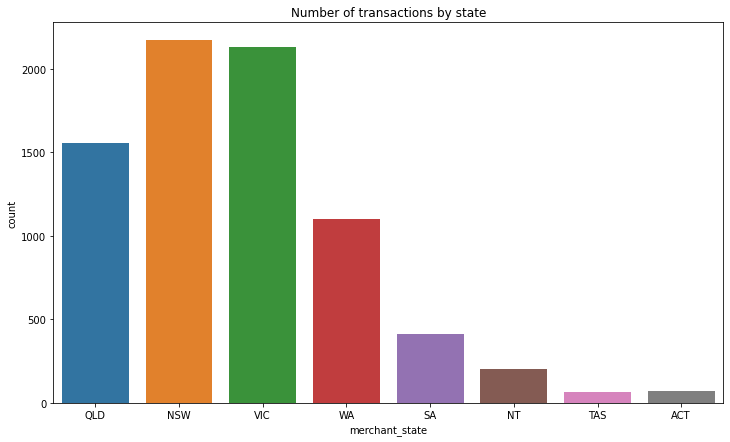

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(df.merchant_state)
plt.title("Number of transactions by state")

In [35]:
df[["merchant_state", "amount"]].groupby("merchant_state", as_index=False).mean().sort_values(
    by="amount", ascending=False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

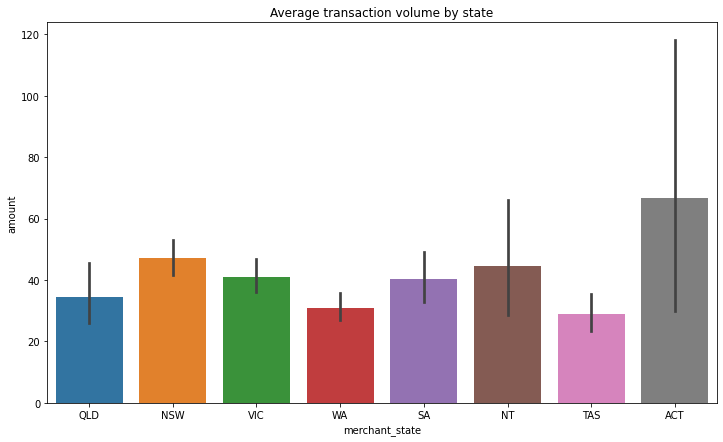

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(x="merchant_state", y="amount", data=df)
plt.title("Average transaction volume by state")

In [38]:
# Extraction
df.extraction.head()
# appears to be timestamps

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [39]:
df[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


In [40]:
# Country
df.country.value_counts(dropna=False)
# consider dropping this column since doesn't provide any info

Australia    12043
Name: country, dtype: int64

In [41]:
# merchant long and lat
df.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

In [42]:
# movement 
df.movement.value_counts(dropna=False)

debit     11160
credit      883
Name: movement, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of transaction by movement')

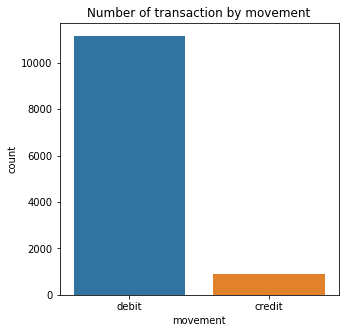

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(df.movement)
plt.title("Number of transaction by movement")

Text(0.5, 1.0, 'Average transaction volume by moment')

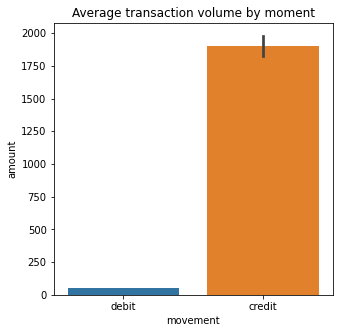

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x="movement", y="amount", data=df)
plt.title("Average transaction volume by moment")
# Average transaction amount for credit transactions are much higher

## Numerical variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance distribution')

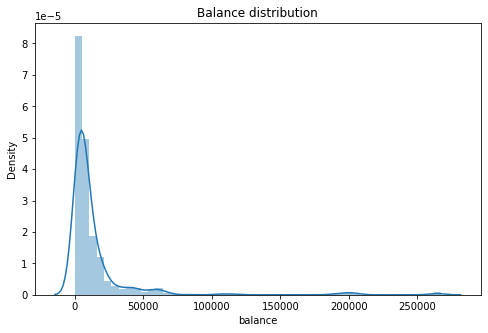

In [45]:
# balance
plt.figure(figsize=(8,5))
sns.distplot(df.balance)
plt.title("Balance distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


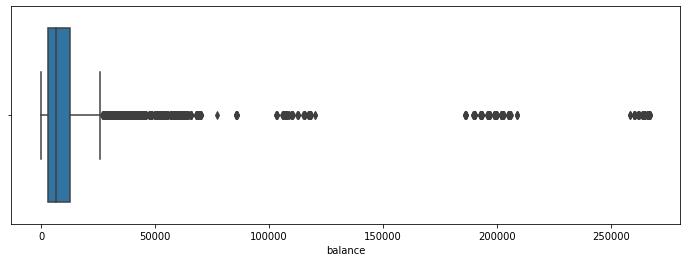

In [46]:
plt.figure(figsize=(12,4))
sns.boxplot(df.balance)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

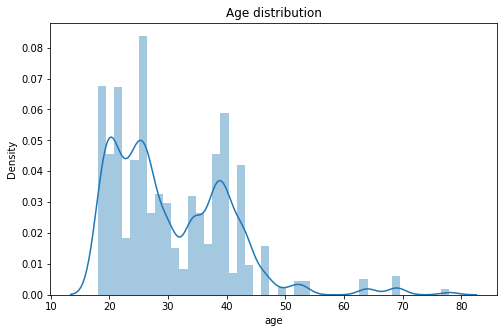

In [47]:
# age of customers
plt.figure(figsize=(8,5))
sns.distplot(df.age)
plt.title("Age distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution')

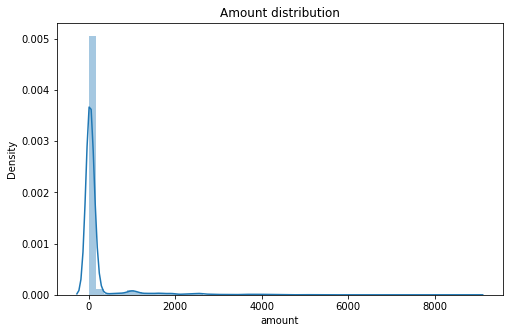

In [48]:
# transaction amount
plt.figure(figsize=(8,5))
sns.distplot(df.amount)
plt.title("Amount distribution")

## Feature Engineering

In [50]:
# Drop unwanted columns
print("Before: ", df.shape)
data = df.drop(["currency", "country"], axis=1)
print("After: ", data.shape)

Before:  (12043, 23)
After:  (12043, 21)


In [54]:
# Deal with missing values
missing = data.isnull().sum()
missing = missing[missing>0]
missing_percentage = round(missing/len(data), 3)*100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(
    by="Percentage", ascending=False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [56]:
# 4326 --> from non-purchased transaction
cols = ["card_present_flag", "merchant_id", "merchant_suburb", "merchant_state", "merchant_long_lat"]
for col in cols:
  data[col].fillna("n/a", inplace=True)

In [57]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(ascending=False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

In [58]:
# Both merchant_code and bpay_biller_code are severely missing, we will drop it
data = data.drop(["merchant_code", "bpay_biller_code"], axis=1)

In [59]:
data.isnull().sum()
# Now, there are no more missing data

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [60]:
daily_amount = pd.DataFrame(data.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

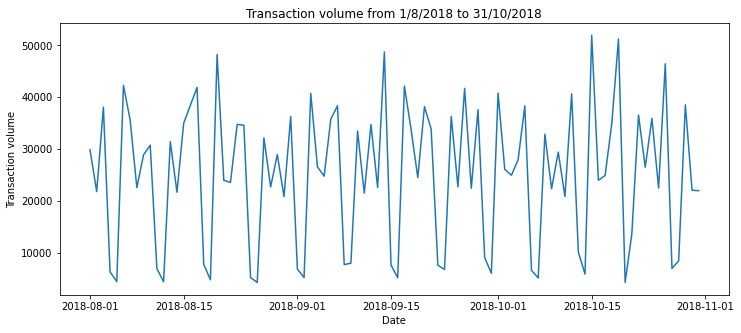

In [61]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

In [62]:
# We will create month, dayofweek, and hour
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [63]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [65]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [67]:
data["hour"] = [time.split(":")[0] for time in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [68]:
print("Before: ", data.hour.dtype)
data["hour"] = pd.to_numeric(data.hour)
print("After: ",data.hour.dtype)

Before:  object
After:  int64


## Deep Dive

In [69]:
# Purchases amount and overall amount
purchases_amount = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

In [70]:
purchases_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

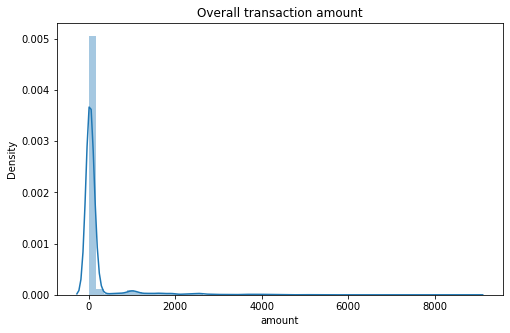

In [71]:
plt.figure(figsize=(8,5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [72]:
# Transaction volume per customer
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum()/3)
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

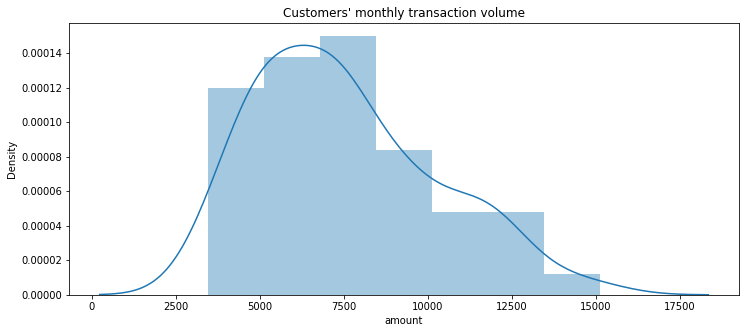

In [73]:
plt.figure(figsize=(12,5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

Text(0.5, 1.0, 'Average transaction volume by month')

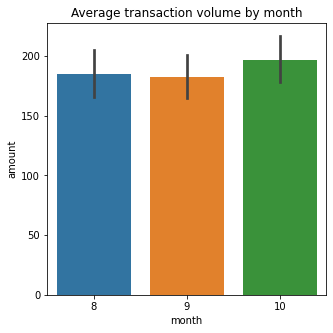

In [74]:
# Transaction volume over time
plt.figure(figsize=(5,5))
sns.barplot(x="month", y="amount", data=data)
plt.title("Average transaction volume by month")

In [75]:
average_daily_volume = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0, 0.5, 'Transaction volume')

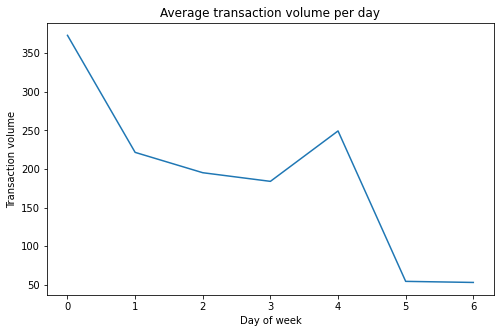

In [76]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.xlabel("Day of week")
plt.ylabel("Transaction volume")
# Friday and Saturday have the lowest average transaction volume

In [77]:
# Group all transaction into 3 categories: Salary, Purchase, Others
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [78]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace=True) 
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0, 0.5, 'Number of transactions')

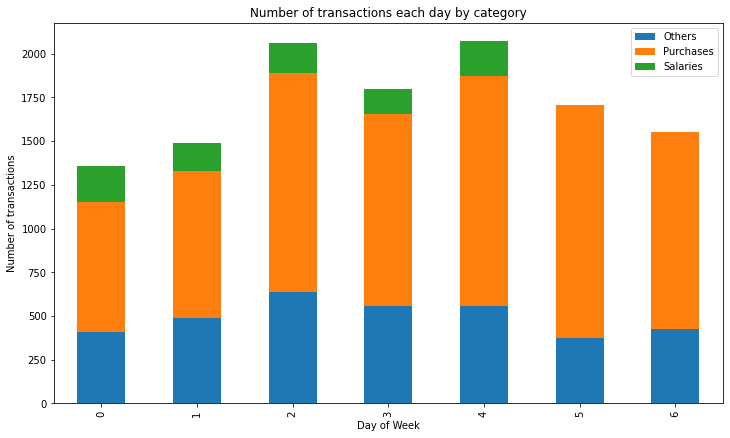

In [79]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind="bar", stacked=True, figsize=(12,7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.xlabel("Day of Week")
plt.ylabel("Number of transactions")

In [80]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0, 0.5, 'Transaction volume')

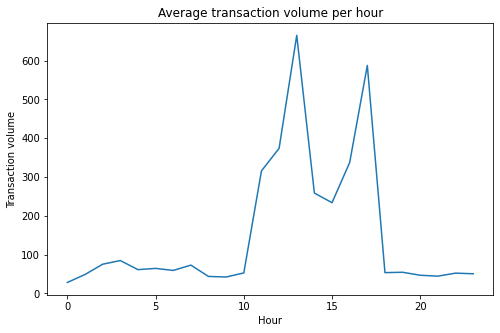

In [81]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.xlabel("Hour")
plt.ylabel("Transaction volume")
# Peak at around midday and late afternoon

Text(0, 0.5, 'Number of transactions')

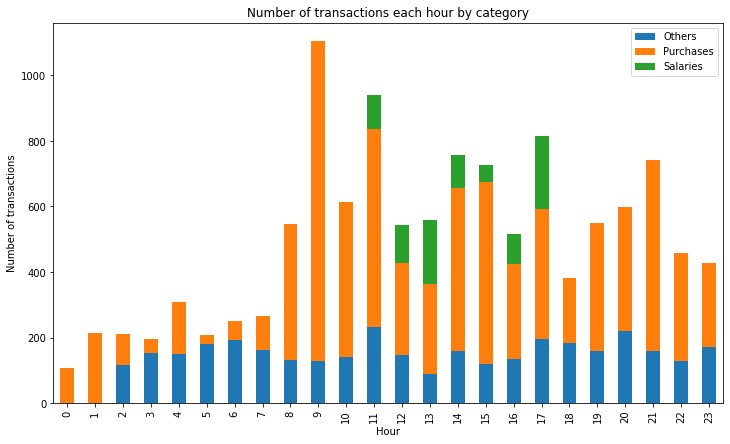

In [82]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind="bar", stacked=True, figsize=(12,7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.xlabel("Hour")
plt.ylabel("Number of transactions")

In [83]:
# https://medium.com/codex/properly-pickle-out-to-a-path-in-python-when-using-google-colab-741f0905e68b
data.to_pickle("/content/drive/MyDrive/ANZ/data.pkl")